In [1]:
# Classifying movie reviews for binary classification
# using IMDB dataset

In [6]:
# loading the IMDB dataset

# dataset is split 50,000 -> 25000 for training and 25000 for test data
import keras
keras.__version__
from keras.datasets import imdb
(train_data, train_labels),(test_data , test_labels) = imdb.load_data(num_words = 10000) # num_words means keep only top 10000 followed words occurring frequently in the training data


17465344/17464789 [==============================] - 108s 6us/step


In [8]:
train_data[0] 
#train_labels[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
#preparing the data 

# encoding integer sequences into binary matrices.

import numpy as np

def vectorize_sequences(sequences , dimension = 10000):
    results = np.zeros((len(sequences),dimension)) # creates all zero matrix of shape (len(sequences), dimensions)
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1 # set specific indices of results[i] equal to 1.
    return results

x_train = vectorize_sequences(train_data) # vectorized training data 
x_test = vectorize_sequences(test_data) # vectorize for test data 

In [11]:
# how does sample look like ?

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# also vectorize the data because it needs to be fed into neural network 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
# compiling the model.


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#crossentropy is usually the best choice when you are dealing with models that output probabilities

# if want to configure parameters of optimizer or pass a custom LOSS function then this can be done using optimzer argument and loss or metrics argument respectively.



In [16]:
# if want to configure parameters of optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# now the losses

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [18]:
# validating data 

# for monitoring purpose to see accuracy of model on data it has not seen yet create validation set and set aside 100000 samples from the 
# training data 

x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
# training the model.

# training for 30 epochs 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 6s 367us/step - loss: 0.5385 - binary_accuracy: 0.7865 - val_loss: 0.4168 - val_binary_accuracy: 0.8577
Epoch 2/30
15000/15000 [==============================] - 4s 281us/step - loss: 0.3309 - binary_accuracy: 0.8993 - val_loss: 0.3208 - val_binary_accuracy: 0.8836
Epoch 3/30
15000/15000 [==============================] - 4s 281us/step - loss: 0.2427 - binary_accuracy: 0.9221 - val_loss: 0.2876 - val_binary_accuracy: 0.8888
Epoch 4/30
15000/15000 [==============================] - 4s 280us/step - loss: 0.1916 - binary_accuracy: 0.9381 - val_loss: 0.2735 - val_binary_accuracy: 0.8905
Epoch 5/30
15000/15000 [==============================] - 4s 280us/step - loss: 0.1570 - binary_accuracy: 0.9505 - val_loss: 0.2748 - val_binary_accuracy: 0.8901
Epoch 6/30
15000/15000 [==============================] - 4s 278us/step - loss: 0.1310 - binary_accuracy: 0.9597 - val_loss: 0.2958 - val_bi

In [21]:
# the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training.


history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

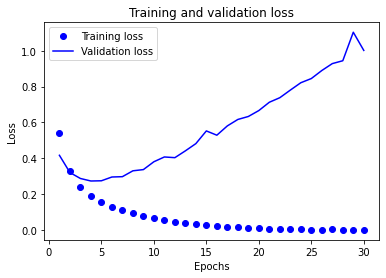

In [23]:
# use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

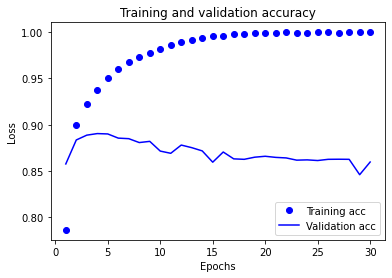

In [24]:
# now plotting tarining and validation accuracy

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [25]:
# main goal : training accuracy increases with every epoch and training loss decreases with every epoch 

# here after the 4th epoch validation loss and accuracy were at peak and then started to show correctly.

# so try to keep epoch = 4

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 211us/step - loss: 0.4424 - accuracy: 0.8212
Epoch 2/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.2511 - accuracy: 0.9120
Epoch 3/4
25000/25000 [==============================] - 4s 176us/step - loss: 0.1965 - accuracy: 0.9311
Epoch 4/4
25000/25000 [==============================] - 7s 265us/step


In [26]:
# exactly as predicted ; the accuracy is now ~ 95%

# this is exampleof overfitting.

In [27]:
# now testing time ! see if the model works correctly.

model.predict(x_test)

# here can see that for some the probability of is nearly 1 i.e 0.99995937

array([[0.19677871],
       [0.9995937 ],
       [0.8670291 ],
       ...,
       [0.11011976],
       [0.07037246],
       [0.73704004]], dtype=float32)

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 5s 316us/step - loss: 0.5494 - binary_accuracy: 0.7889 - val_loss: 0.4150 - val_binary_accuracy: 0.8632
Epoch 2/30
15000/15000 [==============================] - 4s 282us/step - loss: 0.3251 - binary_accuracy: 0.9009 - val_loss: 0.3280 - val_binary_accuracy: 0.8732
Epoch 3/30
15000/15000 [==============================] - 4s 281us/step - loss: 0.2291 - binary_accuracy: 0.9222 - val_loss: 0.2793 - val_binary_accuracy: 0.8899
Epoch 4/30
15000/15000 [==============================] - 4s 283us/step - loss: 0.1713 - binary_accuracy: 0.9447 - val_loss: 0.3062 - val_binary_accuracy: 0.8782
Epoch 5/30
15000/15000 [==============================] - 4s 282us/step - loss: 0.1386 - binary_accuracy: 0.9556 - val_loss: 0.2853 - val_binary_accuracy: 0.8872
Epoch 6/30
15000/15000 [==============================] - 4s 274us/step - loss: 0.1150 - binary_accuracy: 0.9619 - val_loss: 0.3054 - val_bi

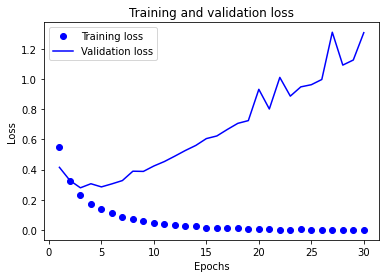

In [28]:
# EXPERIMENTS 

#1. We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.

# the tarining loss reduced.

# -- proof 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#-------------
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#-----------
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#----
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#------------

x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

#--------------

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

#--------------

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

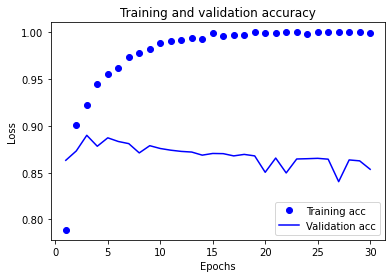

In [29]:
# now plotting tarining and validation accuracy

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 329us/step - loss: 0.5181 - binary_accuracy: 0.7556 - val_loss: 0.3600 - val_binary_accuracy: 0.8688
Epoch 2/20
15000/15000 [==============================] - 4s 292us/step - loss: 0.2793 - binary_accuracy: 0.9003 - val_loss: 0.3225 - val_binary_accuracy: 0.8685
Epoch 3/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.1976 - binary_accuracy: 0.9268 - val_loss: 0.2774 - val_binary_accuracy: 0.8906
Epoch 4/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.1437 - binary_accuracy: 0.9509 - val_loss: 0.4016 - val_binary_accuracy: 0.8520
Epoch 5/20
15000/15000 [==============================] - 4s 294us/step - loss: 0.1105 - binary_accuracy: 0.9648 - val_loss: 0.3216 - val_binary_accuracy: 0.8806
Epoch 6/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.0852 - binary_accuracy: 0.9743 - val_loss: 0.3464 - val_bi

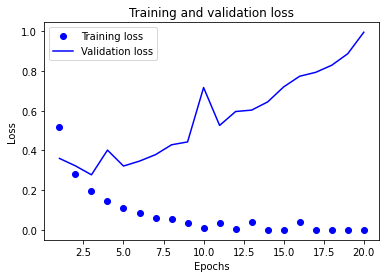

In [30]:
# EXPERIMENT 2 

# Try to use layers with more hidden units or less hidden units: 32 units, 64 units.

# result : accuracy increased !

# --- proof 
    
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#-------------
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#-----------
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#----
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#------------

x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

#--------------

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

#--------------

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.4675 - binary_accuracy: 0.7840 - val_loss: 0.3063 - val_binary_accuracy: 0.8792
Epoch 2/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.2357 - binary_accuracy: 0.9099 - val_loss: 0.3143 - val_binary_accuracy: 0.8736
Epoch 3/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.1802 - binary_accuracy: 0.9296 - val_loss: 0.3142 - val_binary_accuracy: 0.8755
Epoch 4/20
15000/15000 [==============================] - 4s 294us/step - loss: 0.1335 - binary_accuracy: 0.9513 - val_loss: 0.3570 - val_binary_accuracy: 0.8735
Epoch 5/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.1013 - binary_accuracy: 0.9637 - val_loss: 0.3659 - val_binary_accuracy: 0.8768
Epoch 6/20
15000/15000 [==============================] - 4s 293us/step - loss: 0.0925 - binary_accuracy: 0.9680 - val_loss: 0.4227 - val_bi

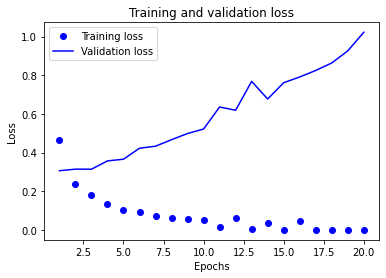

In [31]:
# EXPERIMENT 3 

# Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
#-------------
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#-----------
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#----
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#------------

x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

#--------------

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

#--------------

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
# now predicting it 

model.predict(x_test)

# so the values are going beyond 1 i.e max is 9.99e

array([[8.7962311e-05],
       [9.9997151e-01],
       [9.9698895e-01],
       ...,
       [6.4820633e-05],
       [1.2054952e-04],
       [9.9965727e-01]], dtype=float32)